# Figure 2: Color extraction

In [1]:
import os
import json
import base64
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from io import BytesIO
import numpy as np
import pandas as pd

### Pick some images

In [2]:
images = ['7.jpg',
 '19.jpg',
 '31.jpg',
 '68.jpg',
 '198.jpg',
 '227.jpg',
 '232.jpg',
 '284.jpg',
 '308.jpg'
]

image_idxs = [int(i.split('.')[0]) for i in images]

In [3]:
color_df = pd.read_csv('../filtered_labeled_data.csv')

In [4]:
subdf = color_df[color_df.image_idx.isin(image_idxs)]

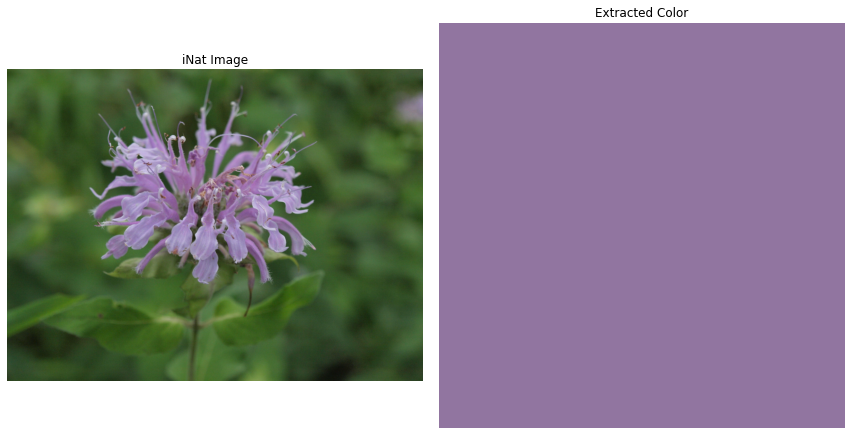

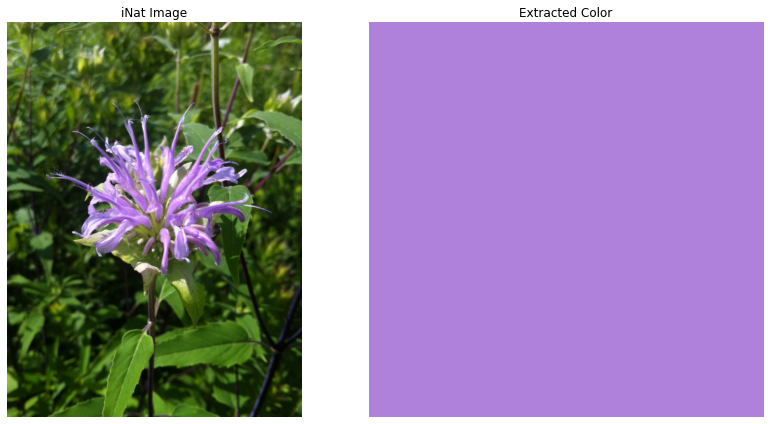

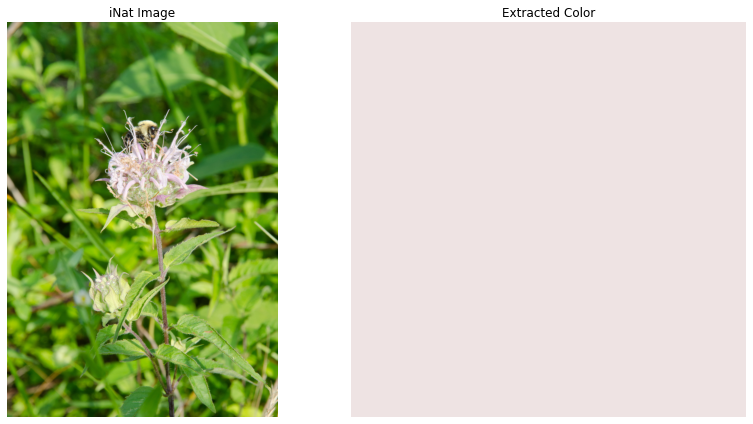

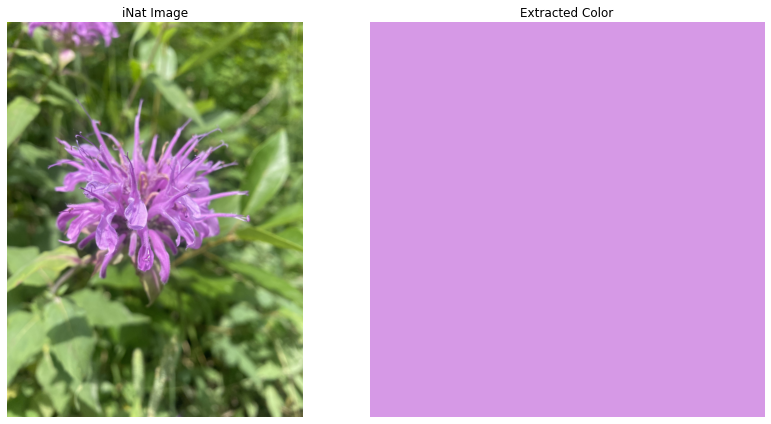

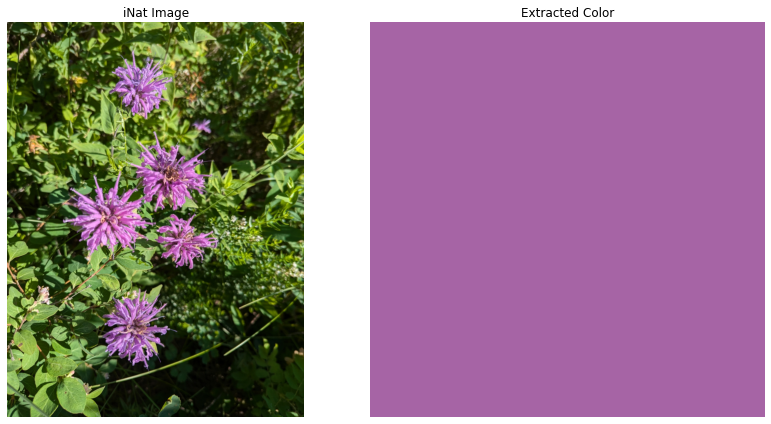

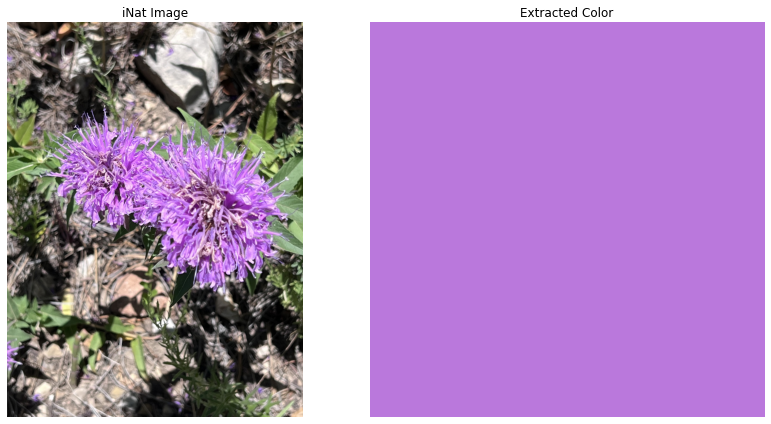

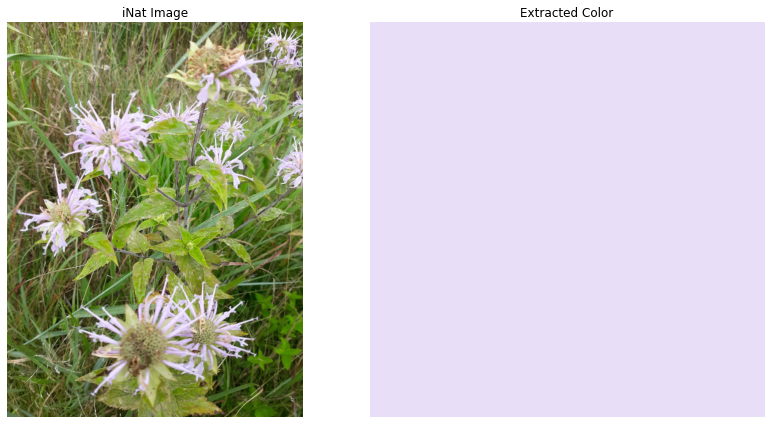

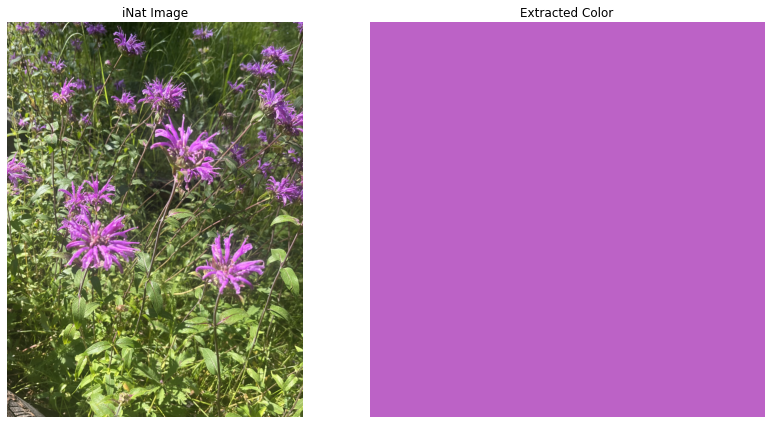

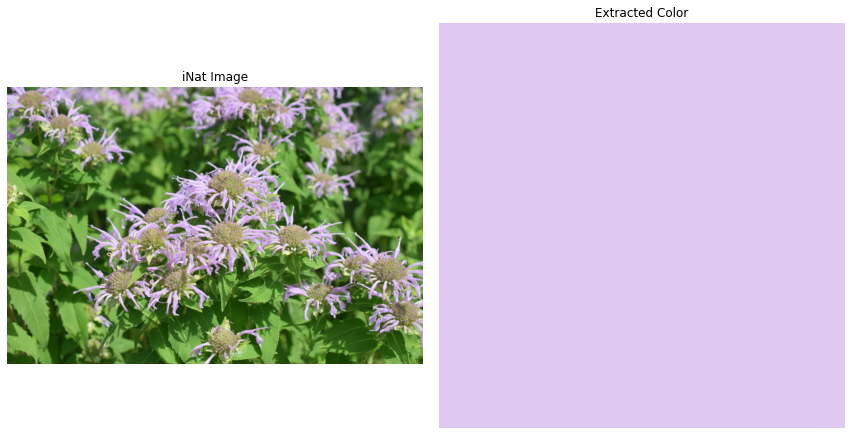

In [5]:
for image in images:
    image_path = os.path.join("/Volumes/My Passport/monarda_fistulosa_segmentation/image_dataset/gpt_filtered_images/",image)
    base_name = os.path.basename(image_path)
    image_idx = int(image.split('.')[0])

    # read in iamge
    orig_img = cv2.imread(image_path)
    orig_img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    # get the rgb from the table
    rgb_str = subdf[subdf.image_idx.eq(image_idx)].rgb.iloc[0]
    # convert to ints
    rgb = rgb_str.strip('()').split(', ')
    rgb = [int(i) for i in rgb]
    
    # make a color patch with the extracted color
    patch_height, patch_width = 5, 5  # block size
    color_patch = np.zeros((patch_height, patch_width, 3), dtype=np.uint8)
    color_patch[:] = rgb

    # side-by-side plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # original image
    axes[0].imshow(orig_img_rgb)
    axes[0].set_title("iNat Image")
    axes[0].axis('off')

    # color patch
    axes[1].imshow(color_patch)
    axes[1].set_title("Extracted Color")
    axes[1].axis('off')

    # plot and write
    plt.tight_layout()
    plt.savefig(f"../figures/figure2/{image}", dpi=300, bbox_inches="tight")
    plt.show()